https://pandas.pydata.org/docs/user_guide/index.html

In [ ]:
import pandas as pd
import numpy as np

# Cheat Sheets:

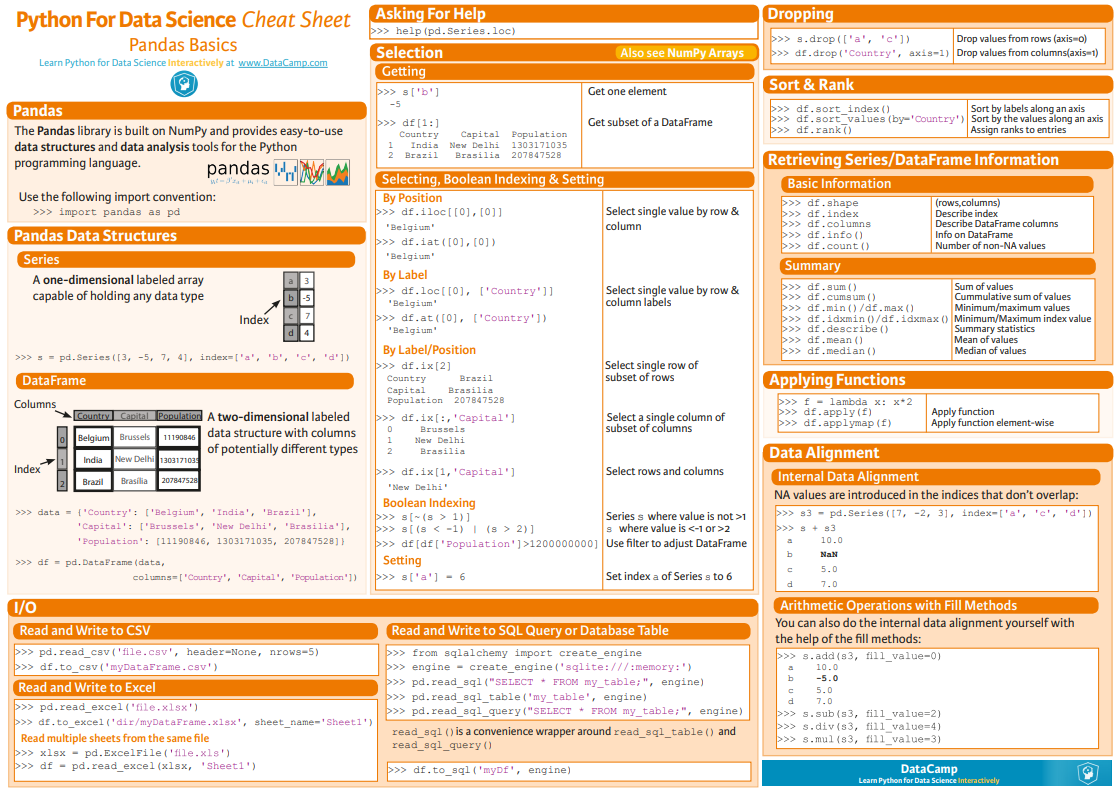

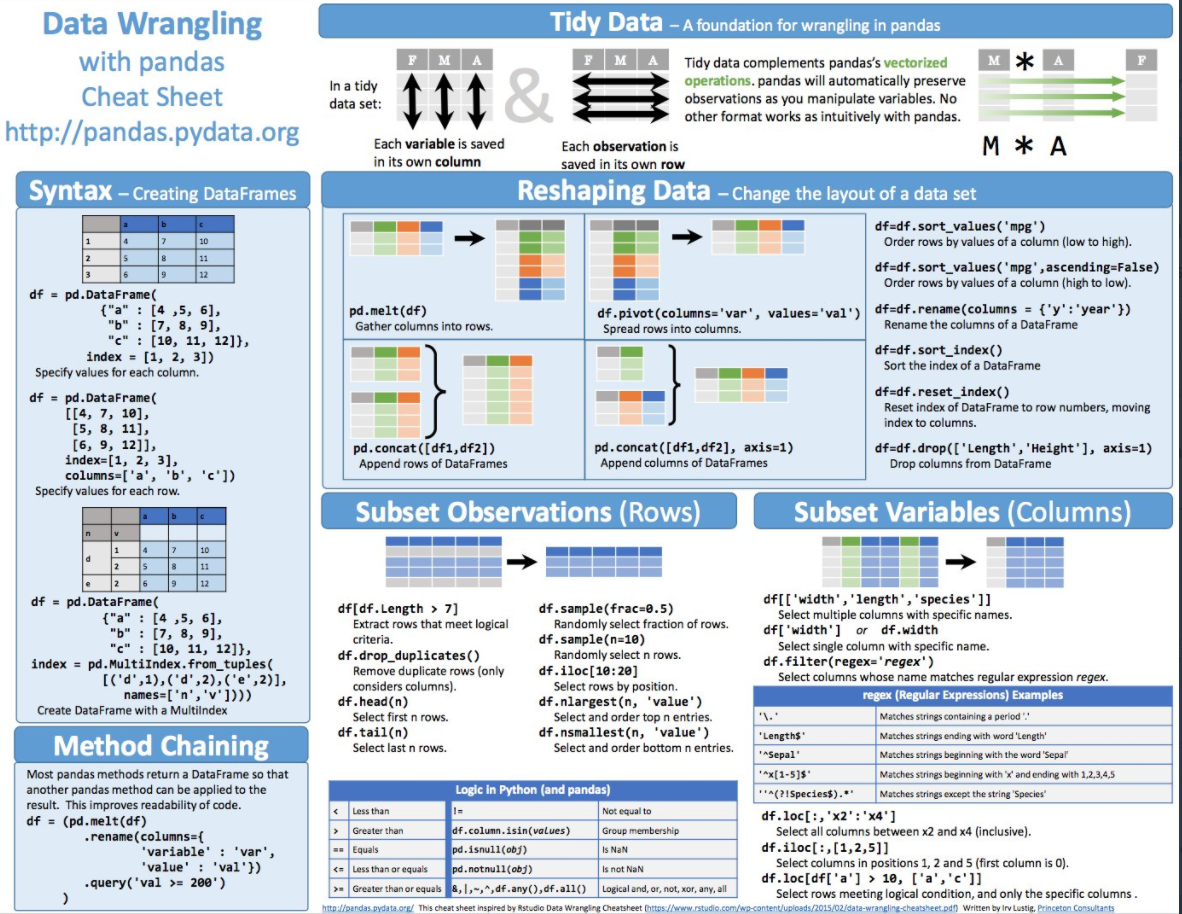

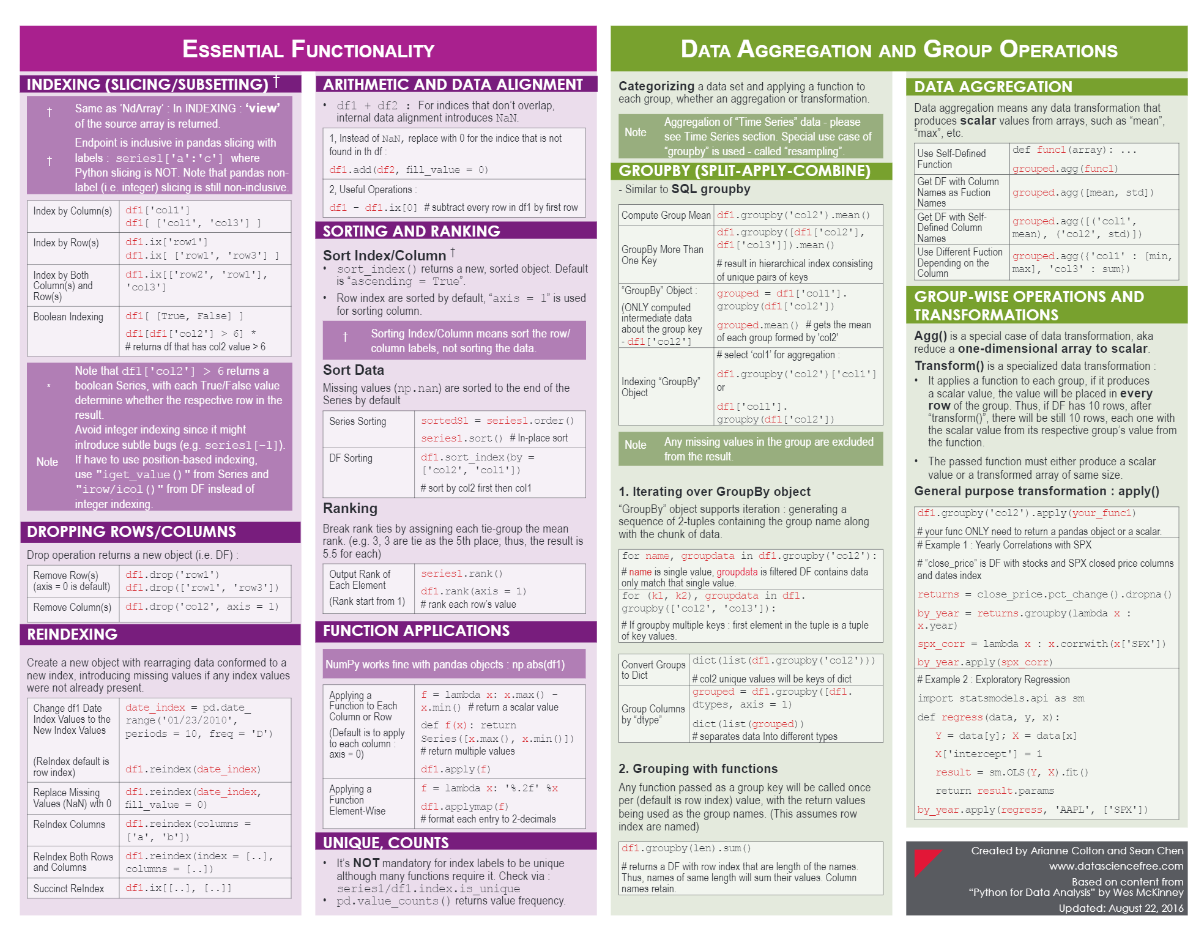

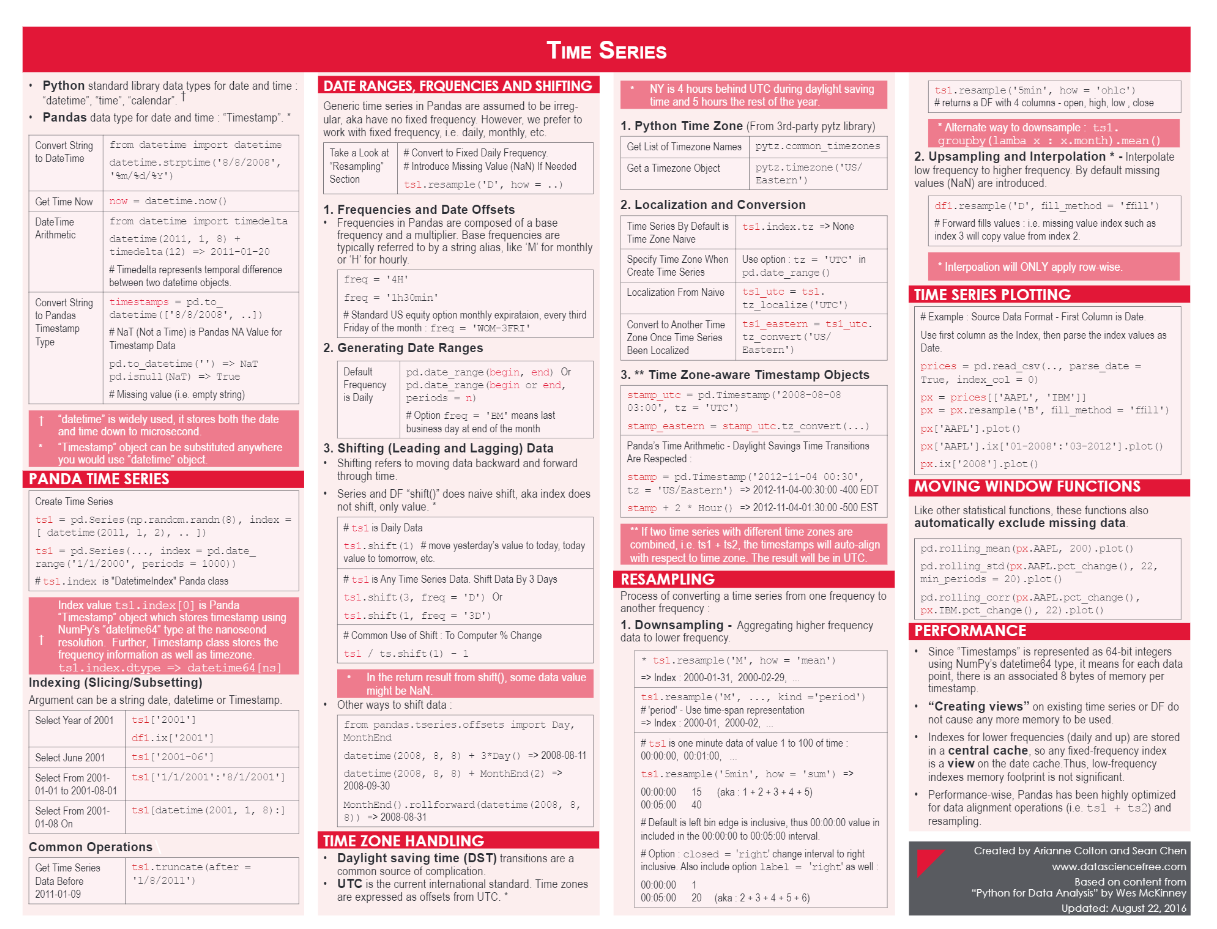

# 1. Downloading and Importing Data

File saved in 765, ipynbs folder if web link ever doesn't work

In [ ]:
! wget https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv

--2020-11-16 22:33:39--  https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv
Resolving vincentarelbundock.github.io (vincentarelbundock.github.io)... 185.199.111.153, 185.199.108.153, 185.199.110.153, ...
Connecting to vincentarelbundock.github.io (vincentarelbundock.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3192560 (3.0M) [text/csv]
Saving to: ‘diamonds.csv’

diamonds.csv        100%[===================>]   3.04M  19.5MB/s    in 0.2s    

2020-11-16 22:33:40 (19.5 MB/s) - ‘diamonds.csv’ saved [3192560/3192560]



In [ ]:
#or d = pd.read_csv(os.listdir()[1])
df = pd.read_csv('diamonds.csv')
df.head()

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe()

Unnamed: 0         carat  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean   26970.500000      0.797940  ...      5.734526      3.538734
std    15571.281097      0.474011  ...      1.142135      0.705699
min        1.000000      0.200000  ...      0.000000      0.000000
25%    13485.750000      0.400000  ...      4.720000      2.910000
50%    26970.500000      0.700000  ...      5.710000      3.530000
75%    40455.250000      1.040000  ...      6.540000      4.040000
max    53940.000000      5.010000  ...     58.900000     31.800000

[8 rows x 8 columns]

In [ ]:
df['cut'].describe()
#categorical describe

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [ ]:
df['carat'].describe()
#numerical describe

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [ ]:
df['carat'].quantile(.9) #90th percentile

1.51

In [ ]:
df['carat'].quantile([.1, .9]) #10th - 90th percentile

0.1    0.31
0.9    1.51
Name: carat, dtype: float64

In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

# Building DataFrame

In [ ]:
list_keys = ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

zipped = zip(list_keys, list_values)
zipped

In [ ]:
# Note: The zip() function in Python 3 and above returns a special zip object, which is essentially a generator. 
# To convert this zip object into a list, you'll need to use list()
list(zipped)

[('Country', ['United States', 'Soviet Union', 'United Kingdom']),
 ('Total', [1118, 473, 273])]

In [ ]:
data = dict(zipped)
data

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [ ]:
df = pd.DataFrame(data)
df

Country  Total
0   United States   1118
1    Soviet Union    473
2  United Kingdom    273

Broadcasting

You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames.

In [ ]:
df['Continent'] = ['NA', 'Asia', 'Europe']
df

Country  Total Continent
0   United States   1118        NA
1    Soviet Union    473      Asia
2  United Kingdom    273    Europe

In [ ]:
df['blah'] = 0
df

Country  Total Continent  blah
0   United States   1118        NA     0
1    Soviet Union    473      Asia     0
2  United Kingdom    273    Europe     0

# 2 Selecting Columns/Rows

## Columns

* Bracket & String Notation
* Dot Notation

In [ ]:
#dot notation - simpler but less powerful - can't use if col name has spaces/special characters
df.carat

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

Bracket & String:

In [ ]:
#bracket & string -
df['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [ ]:
#multiple column selection
df[['carat', 'cut']]

carat        cut
0       0.23      Ideal
1       0.21    Premium
2       0.23       Good
3       0.29    Premium
4       0.31       Good
...      ...        ...
53935   0.72      Ideal
53936   0.72       Good
53937   0.70  Very Good
53938   0.86    Premium
53939   0.75      Ideal

[53940 rows x 2 columns]

In [ ]:
#quotes required for col names unless using a variable
col_to_select = 'cut'
ser1 = df[col_to_select]
ser1

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object

In [ ]:
type(ser1)

pandas.core.series.Series

Series is object returned when selecting a single column from a dataframe



In [ ]:
ser1.name
#series inherits name attribute from column selected from

'cut'

In [ ]:
ser1.keys

<bound method Series.keys of 0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object>

In [ ]:
dict(ser1)[1]
#series as pairings of keys and values - can be converted easily to dictionary

'Premium'

In [ ]:
ser1.values
#values returns numpy array

array(['Ideal', 'Premium', 'Good', ..., 'Very Good', 'Premium', 'Ideal'],
      dtype=object)

## Rows

### Logical Statement Selection

In [ ]:
df[df['cut'] == 'Ideal']
#logical test within brackts
  #selects all rows where cut is "Ideal"

Unnamed: 0  carat    cut color clarity  ...  table  price     x     y     z
0               1   0.23  Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
11             12   0.23  Ideal     J     VS1  ...   56.0    340  3.93  3.90  2.46
13             14   0.31  Ideal     J     SI2  ...   54.0    344  4.35  4.37  2.71
16             17   0.30  Ideal     I     SI2  ...   54.0    348  4.31  4.34  2.68
39             40   0.33  Ideal     I     SI2  ...   55.0    403  4.49  4.51  2.78
...           ...    ...    ...   ...     ...  ...    ...    ...   ...   ...   ...
53925       53926   0.79  Ideal     I     SI1  ...   56.0   2756  5.95  5.97  3.67
53926       53927   0.71  Ideal     E     SI1  ...   56.0   2756  5.71  5.73  3.54
53929       53930   0.71  Ideal     G     VS1  ...   56.0   2756  5.76  5.73  3.53
53935       53936   0.72  Ideal     D     SI1  ...   57.0   2757  5.75  5.76  3.50
53939       53940   0.75  Ideal     D     SI2  ...   55.0   2757  5.83  5.87  3.64

[21551 rows x 11 columns]

In [ ]:
df[df['price'] > 1000]

Unnamed: 0  carat        cut color  ... price     x     y     z
90             91   0.70      Ideal     E  ...  2757  5.70  5.72  3.57
91             92   0.86       Fair     E  ...  2757  6.45  6.33  3.52
92             93   0.70      Ideal     G  ...  2757  5.70  5.67  3.50
93             94   0.71  Very Good     E  ...  2759  5.68  5.73  3.56
94             95   0.78  Very Good     G  ...  2759  5.81  5.85  3.72
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53935       53936   0.72      Ideal     D  ...  2757  5.75  5.76  3.50
53936       53937   0.72       Good     D  ...  2757  5.69  5.75  3.61
53937       53938   0.70  Very Good     D  ...  2757  5.66  5.68  3.56
53938       53939   0.86    Premium     H  ...  2757  6.15  6.12  3.74
53939       53940   0.75      Ideal     D  ...  2757  5.83  5.87  3.64

[39416 rows x 11 columns]

isin method to check multiple conditions

In [ ]:
df[df['cut'].isin(['Ideal', 'Premium'])]

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0               1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1               2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
3               4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
11             12   0.23    Ideal     J     VS1  ...   56.0    340  3.93  3.90  2.46
12             13   0.22  Premium     F     SI1  ...   61.0    342  3.88  3.84  2.33
...           ...    ...      ...   ...     ...  ...    ...    ...   ...   ...   ...
53931       53932   0.71  Premium     F     SI1  ...   62.0   2756  5.74  5.73  3.43
53934       53935   0.72  Premium     D     SI1  ...   59.0   2757  5.69  5.73  3.58
53935       53936   0.72    Ideal     D     SI1  ...   57.0   2757  5.75  5.76  3.50
53938       53939   0.86  Premium     H     SI2  ...   58.0   2757  6.15  6.12  3.74
53939       53940   0.75    Ideal     D     SI2  ...   55.0   2757  5.83  5.87  3.64

[35342 rows x 11 columns]

In [ ]:
df[(df['cut'] == 'Premium') & (df['color'].isin(['E', 'F'])) & (df['price'] < 3000)]
#mutliple conditions separated with bitwise operators ( & | ^) and each condition needs to be in parenthesis

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
1               2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
12             13   0.22  Premium     F     SI1  ...   61.0    342  3.88  3.84  2.33
14             15   0.20  Premium     E     SI2  ...   62.0    345  3.79  3.75  2.27
15             16   0.32  Premium     E      I1  ...   58.0    345  4.38  4.42  2.68
45             46   0.29  Premium     F     SI1  ...   58.0    403  4.24  4.26  2.65
...           ...    ...      ...   ...     ...  ...    ...    ...   ...   ...   ...
53911       53912   0.57  Premium     E      IF  ...   60.0   2753  5.43  5.38  3.23
53912       53913   0.61  Premium     F    VVS1  ...   59.0   2753  5.48  5.40  3.36
53928       53929   0.79  Premium     E     SI2  ...   58.0   2756  6.03  5.96  3.68
53930       53931   0.71  Premium     E     SI1  ...   55.0   2756  5.79  5.74  3.49
53931       53932   0.71  Premium     F     SI1  ...   62.0   2756  5.74  5.73  3.43

[2680 rows x 11 columns]

### .loc & .iloc

In [ ]:
df.iloc[20:25]
#index locate - returns rows based on numerical [index]

Unnamed: 0  carat        cut color clarity  ...  table  price     x     y     z
20          21   0.30       Good     I     SI2  ...   56.0    351  4.26  4.30  2.71
21          22   0.23  Very Good     E     VS2  ...   55.0    352  3.85  3.92  2.48
22          23   0.23  Very Good     H     VS1  ...   57.0    353  3.94  3.96  2.41
23          24   0.31  Very Good     J     SI1  ...   62.0    353  4.39  4.43  2.62
24          25   0.31  Very Good     J     SI1  ...   62.0    353  4.44  4.47  2.59

[5 rows x 11 columns]

.loc looks for index name

In [ ]:
df.loc[15:20]
#locate - returns rows based on name of index
  #called the same way as ^ because this df index is just integers 0:

Unnamed: 0  carat        cut color clarity  ...  table  price     x     y     z
15          16   0.32    Premium     E      I1  ...   58.0    345  4.38  4.42  2.68
16          17   0.30      Ideal     I     SI2  ...   54.0    348  4.31  4.34  2.68
17          18   0.30       Good     J     SI1  ...   54.0    351  4.23  4.29  2.70
18          19   0.30       Good     J     SI1  ...   56.0    351  4.23  4.26  2.71
19          20   0.30  Very Good     J     SI1  ...   59.0    351  4.21  4.27  2.66
20          21   0.30       Good     I     SI2  ...   56.0    351  4.26  4.30  2.71

[6 rows x 11 columns]

In [ ]:
df1 = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df1

max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8

In [ ]:
df1.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [ ]:
df1.loc[['viper', 'sidewinder']]
#using .loc[] on multiple rows [[double brackets]]

max_speed  shield
viper               4       5
sidewinder          7       8

In [ ]:
df1.loc['viper': 'sidewinder']
#using .loc[] on slice of rows

max_speed  shield
viper               4       5
sidewinder          7       8

In [ ]:
df1.loc['viper', 'shield']
#Single label for row and column

5

In [ ]:
df1.loc['cobra':'viper', 'max_speed']
#Slice with labels for row and single label for column

cobra    1
viper    4
Name: max_speed, dtype: int64

Logical loc()

In [ ]:
df1.loc[df1['shield'] > 6]
#locate all rows where conidtion is true

max_speed  shield
sidewinder          7       8

In [ ]:
df1.loc[df1['shield'] > 6, ['max_speed']] # just selects max_speed column
#locate col, rows where condition is true 

max_speed
sidewinder          7

Setting Values with .loc[]

In [ ]:
df1.loc[['viper', 'sidewinder'], ['shield']] = 50
df1

max_speed  shield
cobra               1       2
viper               4      50
sidewinder          7      50

In [ ]:
df1.loc['cobra'] = 10
df1
#set value for an entire row

max_speed  shield
cobra              10      10
viper               4      50
sidewinder          7      50

In [ ]:
df1.loc[:, 'max_speed'] = 30
df1
#set value for an entire column

max_speed  shield
cobra              30      10
viper              30      50
sidewinder         30      50

Getting values with a MultiIndex

In [ ]:
tuples = [
   ('cobra', 'mark i'), ('cobra', 'mark ii'),
   ('sidewinder', 'mark i'), ('sidewinder', 'mark ii'),
   ('viper', 'mark ii'), ('viper', 'mark iii')
]
index = pd.MultiIndex.from_tuples(tuples)
values = [[12, 2], [0, 4], [10, 20],
        [1, 4], [7, 1], [16, 36]]
df2 = pd.DataFrame(values, columns=['max_speed', 'shield'], index=index)
df2

max_speed  shield
cobra      mark i           12       2
           mark ii           0       4
sidewinder mark i           10      20
           mark ii           1       4
viper      mark ii           7       1
           mark iii         16      36

In [ ]:
df2.loc['cobra']
#Single label. Note this returns a DataFrame with a single index.

max_speed  shield
mark i          12       2
mark ii          0       4

In [ ]:
df2.loc[('cobra', 'mark i')]
#Single index tuple. Note this returns a Series.

max_speed    12
shield        2
Name: (cobra, mark i), dtype: int64

### Sort by Values

In [ ]:
df.sort_values('carat', ascending=False)
#ascending keyword allows to sort asc/desc

Unnamed: 0  carat      cut color  ...  price      x      y     z
27415       27416   5.01     Fair     J  ...  18018  10.74  10.54  6.98
27630       27631   4.50     Fair     J  ...  18531  10.23  10.16  6.72
27130       27131   4.13     Fair     H  ...  17329  10.00   9.85  6.43
25999       26000   4.01  Premium     J  ...  15223  10.02   9.94  6.24
25998       25999   4.01  Premium     I  ...  15223  10.14  10.10  6.17
...           ...    ...      ...   ...  ...    ...    ...    ...   ...
31592       31593   0.20  Premium     E  ...    367   3.81   3.78  2.24
31591       31592   0.20  Premium     E  ...    367   3.79   3.77  2.26
31601       31602   0.20  Premium     D  ...    367   3.77   3.72  2.31
14             15   0.20  Premium     E  ...    345   3.79   3.75  2.27
31596       31597   0.20  Premium     F  ...    367   3.73   3.71  2.33

[53940 rows x 11 columns]

In [ ]:
df.sort_values(['carat', 'depth'], ascending=[False, True])
#sorting by multiple columns                 #can pass list into ascending argument as well to vary 

Unnamed: 0  carat        cut color  ...  price      x      y     z
27415       27416   5.01       Fair     J  ...  18018  10.74  10.54  6.98
27630       27631   4.50       Fair     J  ...  18531  10.23  10.16  6.72
27130       27131   4.13       Fair     H  ...  17329  10.00   9.85  6.43
25998       25999   4.01    Premium     I  ...  15223  10.14  10.10  6.17
25999       26000   4.01    Premium     J  ...  15223  10.02   9.94  6.24
...           ...    ...        ...   ...  ...    ...    ...    ...   ...
31601       31602   0.20    Premium     D  ...    367   3.77   3.72  2.31
31599       31600   0.20      Ideal     E  ...    367   3.76   3.73  2.33
31600       31601   0.20    Premium     D  ...    367   3.73   3.68  2.31
31596       31597   0.20    Premium     F  ...    367   3.73   3.71  2.33
31598       31599   0.20  Very Good     E  ...    367   3.74   3.71  2.36

[53940 rows x 11 columns]

# 3 - Aggregating Data

## Summary Statistics (central tendency / dispersion)

In [ ]:
df.mean()
#calling aggregate function on entire df will return summarized values for all columns

Unnamed: 0    26970.500000
carat             0.797940
depth            61.749405
table            57.457184
price          3932.799722
x                 5.731157
y                 5.734526
z                 3.538734
dtype: float64

In [ ]:
df['price'].sum()

212135217

In [ ]:
df['price'].mean()

3932.799721913237

In [ ]:
df['price'].median()

2401.0

In [ ]:
df['price'].min()

326

In [ ]:
df['price'].max()

18823

In [ ]:
df['price'].std()

3989.4397381463023

In [ ]:
df['price'].var()

15915629.424300838

In [ ]:
df['price'].quantile()

2401.0

.agg() method <br > 
Aggregate using one or more operations over the specified axis. <br >
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
<br >
Allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient.


In [ ]:
import math

df['price'].agg(math.sin)
# taking the sin of all prices (cuz why not)

0       -0.663611
1       -0.663611
2        0.270935
3        0.836672
4        0.912933
           ...   
53935   -0.968304
53936   -0.968304
53937   -0.968304
53938   -0.968304
53939   -0.968304
Name: price, Length: 53940, dtype: float64

Self-defined functions

In [ ]:
def pct30(column):
  return column.quantile(0.3)
  
df['price'].agg(pct30)
#returns price at 30th percentile

1087.0

Applying multiple functions on multiple columns

In [ ]:
#summaries on multiple columns
def pct40(column):
  return column.quantile(0.4)
df[['price', 'carat']].agg([pct30,pct40])

price  carat
pct30  1087.0   0.42
pct40  1698.0   0.53

Cumulative Statistics

In [ ]:
df['price'].cumsum()
# df['price'].cummax()
# df['price'].cummin()
# df['price'].cumprod()

0              326
1              652
2              979
3             1313
4             1648
           ...    
53935    212124189
53936    212126946
53937    212129703
53938    212132460
53939    212135217
Name: price, Length: 53940, dtype: int64

In [ ]:
df['price'].cummax()

0          326
1          326
2          327
3          334
4          335
         ...  
53935    18823
53936    18823
53937    18823
53938    18823
53939    18823
Name: price, Length: 53940, dtype: int64

## Counting

In [ ]:
df.drop_duplicates(subset = 'carat')
#returns one row for each value of carat (first val found)

Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.95  3.98  2.43
1               2   0.21    Premium     E  ...   326  3.89  3.84  2.31
3               4   0.29    Premium     I  ...   334  4.20  4.23  2.63
4               5   0.31       Good     J  ...   335  4.34  4.35  2.75
5               6   0.24  Very Good     J  ...   336  3.94  3.96  2.48
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
28467       28468   0.45      Ideal     J  ...   672  4.94  4.97  3.04
30044       30045   0.47       Fair     F  ...   719  4.81  4.72  3.23
30961       30962   0.46      Ideal     J  ...   746  4.96  5.00  3.06
33771       33772   0.48      Ideal     G  ...   841  5.04  5.06  3.13
35457       35458   0.49    Premium     J  ...   900  5.14  5.12  3.07

[273 rows x 11 columns]

In [ ]:
df.drop_duplicates(subset = ['carat', 'color']).sort_values(['carat', 'color'])
#returns one row for each combination of carat and color (first combo val found)

Unnamed: 0  carat      cut color  ...  price      x      y     z
31597       31598   0.20    Ideal     D  ...    367   3.81   3.77  2.33
14             15   0.20  Premium     E  ...    345   3.79   3.75  2.27
31596       31597   0.20  Premium     F  ...    367   3.73   3.71  2.33
38276       38277   0.21  Premium     D  ...    386   3.82   3.78  2.34
1               2   0.21  Premium     E  ...    326   3.89   3.84  2.31
...           ...    ...      ...   ...  ...    ...    ...    ...   ...
25998       25999   4.01  Premium     I  ...  15223  10.14  10.10  6.17
25999       26000   4.01  Premium     J  ...  15223  10.02   9.94  6.24
27130       27131   4.13     Fair     H  ...  17329  10.00   9.85  6.43
27630       27631   4.50     Fair     J  ...  18531  10.23  10.16  6.72
27415       27416   5.01     Fair     J  ...  18018  10.74  10.54  6.98

[1468 rows x 11 columns]

Value counts

In [ ]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Proportions with .normalize()

In [ ]:
df['cut'].value_counts(normalize = True)

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

## Grouped Summary Statistics (+Pivot Tables)

In [ ]:
df.groupby('cut')['price'].mean().sort_values(ascending = False)

cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64

In [ ]:
df.groupby('cut')['price'].agg([min, max, sum])
#Multiple grouped summaries

min    max       sum
cut                            
Fair       337  18574   7017600
Good       327  18788  19275009
Ideal      326  18806  74513487
Premium    326  18823  63221498
Very Good  336  18818  48107623

Groupby multiple variables

In [ ]:
df.groupby(['cut','color' ])['price'].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

Transformation <br >

While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine.
For such a transformation, the output is the same shape as the input.
A common example is to center the data by subtracting the group-wise mean:

In [ ]:
df.groupby('cut').transform(lambda x: x - x.mean())
#returns df with difference from mean for each datapoint 

Unnamed: 0     carat     depth  ...         x         y         z
0     -29046.630736 -0.472837 -0.209401  ... -1.557451 -1.540080 -0.971448
1     -25598.209049 -0.681955 -1.464673  ... -2.083887 -2.104879 -1.337124
2     -24771.931309 -0.619185 -5.465879  ... -1.788785 -1.780744 -1.329507
3     -25596.209049 -0.601955  1.135327  ... -1.773887 -1.714879 -1.017124
4     -24769.931309 -0.539185  0.934121  ... -1.498785 -1.500744 -0.889507
...             ...       ...       ...  ...       ...       ...       ...
53935  24888.369264  0.017163 -0.909401  ...  0.242549  0.239920  0.098552
53936  29162.068691 -0.129185  0.734121  ... -0.148785 -0.100744 -0.029507
53937  27840.686807 -0.106381  0.981725  ... -0.080696 -0.090026  0.000199
53938  28338.790951 -0.031955 -0.264673  ...  0.176113  0.175121  0.092876
53939  24892.369264  0.047163  0.490599  ...  0.322549  0.349920  0.238552

[53940 rows x 8 columns]

In [ ]:
df.groupby('cut').transform(lambda x: x - x.mean())['price']
#can also select columns from transformed df

0       -3131.541970
1       -4258.257704
2       -3601.864452
3       -4250.257704
4       -3593.864452
            ...     
53935    -700.541970
53936   -1171.864452
53937   -1224.759891
53938   -1827.257704
53939    -700.541970
Name: price, Length: 53940, dtype: float64

### Pivot Table

In [ ]:
df.pivot_table(values = 'price', index = 'cut')
#mean is default aggregate function for pivot table

price
cut                   
Fair       4358.757764
Good       3928.864452
Ideal      3457.541970
Premium    4584.257704
Very Good  3981.759891

In [ ]:
359


10000000.0

In [ ]:
df.pivot_table(values = 'price', index = ['cut', 'color'])
#multiple column pivot

price
cut       color             
Fair      D      4291.061350
          E      3682.312500
          F      3827.003205
          G      4239.254777
          H      5135.683168
          I      4685.445714
          J      4975.655462
Good      D      3405.382175
          E      3423.644159
          F      3495.750275
          G      4123.482204
          H      4276.254986
          I      5078.532567
          J      4574.172638
Ideal     D      2629.094566
          E      2597.550090
          F      3374.939362
          G      3720.706388
          H      3889.334831
          I      4451.970377
          J      4918.186384
Premium   D      3631.292576
          E      3538.914420
          F      4324.890176
          G      4500.742134
          H      5216.706780
          I      5946.180672
          J      6294.591584
Very Good D      3470.467284
          E      3214.652083
          F      3778.820240
          G      3872.753806
          H      4535.390351
          I      5255.879568
          J      5103.513274

In [ ]:
import numpy as np
df.pivot_table(values='price', index = 'cut', aggfunc= np.median)

price
cut              
Fair       3282.0
Good       3050.5
Ideal      1810.0
Premium    3185.0
Very Good  2648.0

In [ ]:
#to get multiple summary statistics, can pass multiple arguments ot aggfunc argument
df.pivot_table(values='price', index = 'cut', aggfunc= [np.mean, np.median])

mean  median
                 price   price
cut                           
Fair       4358.757764  3282.0
Good       3928.864452  3050.5
Ideal      3457.541970  1810.0
Premium    4584.257704  3185.0
Very Good  3981.759891  2648.0

In [ ]:
#can add columns argument
df.pivot_table(values = 'price', index = 'cut', columns = 'color')

color                D            E  ...            I            J
cut                                  ...                          
Fair       4291.061350  3682.312500  ...  4685.445714  4975.655462
Good       3405.382175  3423.644159  ...  5078.532567  4574.172638
Ideal      2629.094566  2597.550090  ...  4451.970377  4918.186384
Premium    3631.292576  3538.914420  ...  5946.180672  6294.591584
Very Good  3470.467284  3214.652083  ...  5255.879568  5103.513274

[5 rows x 7 columns]

In [ ]:
df.pivot_table(values = 'price', index = 'cut', columns = 'color', margins = True)
#margins=True argument adds summaries for rows/columns

color                D            E  ...            J          All
cut                                  ...                          
Fair       4291.061350  3682.312500  ...  4975.655462  4358.757764
Good       3405.382175  3423.644159  ...  4574.172638  3928.864452
Ideal      2629.094566  2597.550090  ...  4918.186384  3457.541970
Premium    3631.292576  3538.914420  ...  6294.591584  4584.257704
Very Good  3470.467284  3214.652083  ...  5103.513274  3981.759891
All        3169.954096  3076.752475  ...  5323.818020  3932.799722

[6 rows x 8 columns]

# 4 Cleaning Data

Tidy Data:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table. (Each value must have its own cell.)

## Data types

dtype attribute

In [ ]:
df['table'].dtype

dtype('float64')

Can change type of data with .astype()

In [ ]:
df.head()

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]

In [ ]:
df['table'].astype('int')

0        55
1        61
2        65
3        58
4        58
         ..
53935    57
53936    55
53937    60
53938    58
53939    55
Name: table, Length: 53940, dtype: int64

Categorical variables stored as numbers 

In [ ]:
import seaborn as sns
df1 = sns.load_dataset('titanic')
df1['pclass'].describe()
#thinks passenger class is a numeric variable and describes returns summary statistics 

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

In [ ]:
df1['pclass'].astype('category').describe()
#changing type to 'category' fixes issue


count     891
unique      3
top         3
freq      491
Name: pclass, dtype: int64

## Cleaning string data

Stripping elements from string

In [ ]:
df['price'] = '$ ' + df['price'].astype('str')
df.head()

Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0  $ 326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0  $ 326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0  $ 327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0  $ 334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0  $ 335  4.34  4.35  2.75

[5 rows x 11 columns]

In [ ]:
df['price'].str.strip('$ ').astype('int')
#or
# df['price'].str.replace('$', '').astype('int')

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

Splitting a string

In [ ]:
mpg = sns.load_dataset('mpg')
mpg.head()

mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]

In [ ]:
mpg['make'] = mpg['name'].str.split(' ').str[0]
mpg
#uses the first word of name column to grab the make of the car

mpg  cylinders  ...                       name       make
0    18.0          8  ...  chevrolet chevelle malibu  chevrolet
1    15.0          8  ...          buick skylark 320      buick
2    18.0          8  ...         plymouth satellite   plymouth
3    16.0          8  ...              amc rebel sst        amc
4    17.0          8  ...                ford torino       ford
..    ...        ...  ...                        ...        ...
393  27.0          4  ...            ford mustang gl       ford
394  44.0          4  ...                  vw pickup         vw
395  32.0          4  ...              dodge rampage      dodge
396  28.0          4  ...                ford ranger       ford
397  31.0          4  ...                 chevy s-10      chevy

[398 rows x 10 columns]

## Duplicated values

In [ ]:
df.duplicated()
#returns boolean array of True/False values 

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [ ]:
df.duplicated(subset = ['carat', 'color'])
#returns rows that have same values in carat and color column

0        False
1        False
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Length: 53940, dtype: bool

In [ ]:
duplicates = df.duplicated(subset = ['carat', 'color'], keep = False)
df[duplicates]
#use boolean array to filter orig dataframe to get all non duplicated values

Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.95  3.98  2.43
1               2   0.21    Premium     E  ...   326  3.89  3.84  2.31
2               3   0.23       Good     E  ...   327  4.05  4.07  2.31
3               4   0.29    Premium     I  ...   334  4.20  4.23  2.63
4               5   0.31       Good     J  ...   335  4.34  4.35  2.75
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53935       53936   0.72      Ideal     D  ...  2757  5.75  5.76  3.50
53936       53937   0.72       Good     D  ...  2757  5.69  5.75  3.61
53937       53938   0.70  Very Good     D  ...  2757  5.66  5.68  3.56
53938       53939   0.86    Premium     H  ...  2757  6.15  6.12  3.74
53939       53940   0.75      Ideal     D  ...  2757  5.83  5.87  3.64

[53760 rows x 11 columns]

.drop_duplicates() - takes same arguments as duplicated() method, but returns df without duplicate values

### Categorical Data

Collapsing data into categories

qcut() divides into set number of equally sized bins

In [ ]:
group_names = ['low', 'med', 'high']
df1 = df.copy()
df1['price_group'] = pd.qcut(df1['price'], q = 3, labels = group_names)
df1

Unnamed: 0  carat        cut color  ...     x     y     z  price_group
0               1   0.23      Ideal     E  ...  3.95  3.98  2.43          low
1               2   0.21    Premium     E  ...  3.89  3.84  2.31          low
2               3   0.23       Good     E  ...  4.05  4.07  2.31          low
3               4   0.29    Premium     I  ...  4.20  4.23  2.63          low
4               5   0.31       Good     J  ...  4.34  4.35  2.75          low
...           ...    ...        ...   ...  ...   ...   ...   ...          ...
53935       53936   0.72      Ideal     D  ...  5.75  5.76  3.50          med
53936       53937   0.72       Good     D  ...  5.69  5.75  3.61          med
53937       53938   0.70  Very Good     D  ...  5.66  5.68  3.56          med
53938       53939   0.86    Premium     H  ...  6.15  6.12  3.74          med
53939       53940   0.75      Ideal     D  ...  5.83  5.87  3.64          med

[53940 rows x 12 columns]

cut() divides into bins based on upper / lower limits specified

In [ ]:
ranges = [0,1000, 10000, np.inf]
group_names = ['0-1000', '1001-10000', '10001 +']
df1 = df.copy()
df1['price_group'] = pd.cut(df1['price'], bins = ranges, labels = group_names)
df1

Unnamed: 0  carat        cut color  ...     x     y     z  price_group
0               1   0.23      Ideal     E  ...  3.95  3.98  2.43       0-1000
1               2   0.21    Premium     E  ...  3.89  3.84  2.31       0-1000
2               3   0.23       Good     E  ...  4.05  4.07  2.31       0-1000
3               4   0.29    Premium     I  ...  4.20  4.23  2.63       0-1000
4               5   0.31       Good     J  ...  4.34  4.35  2.75       0-1000
...           ...    ...        ...   ...  ...   ...   ...   ...          ...
53935       53936   0.72      Ideal     D  ...  5.75  5.76  3.50   1001-10000
53936       53937   0.72       Good     D  ...  5.69  5.75  3.61   1001-10000
53937       53938   0.70  Very Good     D  ...  5.66  5.68  3.56   1001-10000
53938       53939   0.86    Premium     H  ...  6.15  6.12  3.74   1001-10000
53939       53940   0.75      Ideal     D  ...  5.83  5.87  3.64   1001-10000

[53940 rows x 12 columns]

In [ ]:
df[df['price_group'] == '10001 +']

Unnamed: 0  carat        cut color  ...     x     y     z  price_group
21928       21929   1.70      Ideal     J  ...  7.73  7.74  4.68      10001 +
21929       21930   1.03      Ideal     E  ...  6.50  6.53  3.95      10001 +
21930       21931   1.23  Very Good     G  ...  6.93  7.02  4.23      10001 +
21931       21932   1.25      Ideal     F  ...  6.93  6.96  4.28      10001 +
21932       21933   2.01  Very Good     I  ...  8.19  7.96  4.96      10001 +
...           ...    ...        ...   ...  ...   ...   ...   ...          ...
27745       27746   2.00  Very Good     H  ...  7.95  8.00  5.01      10001 +
27746       27747   2.07      Ideal     G  ...  8.20  8.13  5.11      10001 +
27747       27748   1.51      Ideal     G  ...  7.37  7.41  4.56      10001 +
27748       27749   2.00  Very Good     G  ...  7.90  7.97  5.04      10001 +
27749       27750   2.29    Premium     I  ...  8.50  8.47  5.16      10001 +

[5222 rows x 12 columns]

Collapsing data into fewer categories

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
mapping = {'Ideal': 'Good', 'Premium':'Good', 'Good':'Bad', 'Very Good': 'Good', 'Fair':'Bad'}
df1 = df.copy()
df1['cut'] = df1['cut'].replace(mapping)
df1.head()
#uses replace method and dictionary mapping to collapse categorical variable into fewer categories

Unnamed: 0  carat   cut color clarity  depth  table  price     x     y     z
0           1   0.23  Good     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1           2   0.21  Good     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2           3   0.23   Bad     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3           4   0.29  Good     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4           5   0.31   Bad     J     SI2   63.3   58.0    335  4.34  4.35  2.75

# 5 - Joining Data

Inner Join - Only returns rows with matching values in both dataframes <br >
-default for .join() and .merge() methods

In [ ]:
df1 = df[list(df.columns[:5])]
df2 = df[list(df.columns[5:])]
print(df1.head())
print(df2.head())

#now have 2 dfs with a common index

   Unnamed: 0  carat      cut color clarity
0           1   0.23    Ideal     E     SI2
1           2   0.21  Premium     E     SI1
2           3   0.23     Good     E     VS1
3           4   0.29  Premium     I     VS2
4           5   0.31     Good     J     SI2
   depth  table  price     x     y     z
0   61.5   55.0    326  3.95  3.98  2.43
1   59.8   61.0    326  3.89  3.84  2.31
2   56.9   65.0    327  4.05  4.07  2.31
3   62.4   58.0    334  4.20  4.23  2.63
4   63.3   58.0    335  4.34  4.35  2.75


In [ ]:
df1.join(df2)
#joins on index by default

Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.95  3.98  2.43
1               2   0.21    Premium     E  ...   326  3.89  3.84  2.31
2               3   0.23       Good     E  ...   327  4.05  4.07  2.31
3               4   0.29    Premium     I  ...   334  4.20  4.23  2.63
4               5   0.31       Good     J  ...   335  4.34  4.35  2.75
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53935       53936   0.72      Ideal     D  ...  2757  5.75  5.76  3.50
53936       53937   0.72       Good     D  ...  2757  5.69  5.75  3.61
53937       53938   0.70  Very Good     D  ...  2757  5.66  5.68  3.56
53938       53939   0.86    Premium     H  ...  2757  6.15  6.12  3.74
53939       53940   0.75      Ideal     D  ...  2757  5.83  5.87  3.64

[53940 rows x 11 columns]

.merge()

In [ ]:
df1 = df[list(df.columns[:5])]
df2 = df[list(df.columns[5:])]
df2['Unnamed: 0'] = df2.index.values
print(df1.head())
print(df2.head())

   Unnamed: 0  carat      cut color clarity
0           1   0.23    Ideal     E     SI2
1           2   0.21  Premium     E     SI1
2           3   0.23     Good     E     VS1
3           4   0.29  Premium     I     VS2
4           5   0.31     Good     J     SI2
   depth  table  price     x     y     z  Unnamed: 0
0   61.5   55.0    326  3.95  3.98  2.43           0
1   59.8   61.0    326  3.89  3.84  2.31           1
2   56.9   65.0    327  4.05  4.07  2.31           2
3   62.4   58.0    334  4.20  4.23  2.63           3
4   63.3   58.0    335  4.34  4.35  2.75           4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.merge(df2, on = 'Unnamed: 0', suffixes=['_1','_2'], 
          validate = 'one_to_one') # ensures one_to_one relationship between tables
#can merge on multiple columns by passing a list to on=

Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.89  3.84  2.31
1               2   0.21    Premium     E  ...   327  4.05  4.07  2.31
2               3   0.23       Good     E  ...   334  4.20  4.23  2.63
3               4   0.29    Premium     I  ...   335  4.34  4.35  2.75
4               5   0.31       Good     J  ...   336  3.94  3.96  2.48
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53934       53935   0.72    Premium     D  ...  2757  5.75  5.76  3.50
53935       53936   0.72      Ideal     D  ...  2757  5.69  5.75  3.61
53936       53937   0.72       Good     D  ...  2757  5.66  5.68  3.56
53937       53938   0.70  Very Good     D  ...  2757  6.15  6.12  3.74
53938       53939   0.86    Premium     H  ...  2757  5.83  5.87  3.64

[53939 rows x 11 columns]

## Different Joins (left, right, outer, self)

* Left join, right join, outer join
* Self-join

In [ ]:
df

Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.95  3.98  2.43
1               2   0.21    Premium     E  ...   326  3.89  3.84  2.31
2               3   0.23       Good     E  ...   327  4.05  4.07  2.31
3               4   0.29    Premium     I  ...   334  4.20  4.23  2.63
4               5   0.31       Good     J  ...   335  4.34  4.35  2.75
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53935       53936   0.72      Ideal     D  ...  2757  5.75  5.76  3.50
53936       53937   0.72       Good     D  ...  2757  5.69  5.75  3.61
53937       53938   0.70  Very Good     D  ...  2757  5.66  5.68  3.56
53938       53939   0.86    Premium     H  ...  2757  6.15  6.12  3.74
53939       53940   0.75      Ideal     D  ...  2757  5.83  5.87  3.64

[53940 rows x 11 columns]

In [ ]:
dfc = df[['Unnamed: 0','carat']]
dfc['carat'] = np.random.random(size = dfc.shape[0])
dfc.columns = ['Unnamed: 0', 'Rand']
dfc = dfc[dfc['Rand'] > .7]
dfc
#creating new df called dfc - has index for 70% of values in orig df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0      Rand
0               1  0.964886
6               7  0.719703
14             15  0.888239
15             16  0.808636
16             17  0.838699
...           ...       ...
53913       53914  0.788213
53916       53917  0.757799
53917       53918  0.765847
53926       53927  0.781204
53935       53936  0.871401

[16400 rows x 2 columns]

**Left Join**





returns all rows in left table, and only rows in right table where there is a match in both

Many to one / one to many relationships - might not be matching rows for all tables being joined

In [ ]:
df.merge(dfc, how = 'left', on = 'Unnamed: 0',   #when merging on columns with same name can use just one on= argument
         validate = 'one_to_many')               #validate argument makes sure realtionship between tables is as specified
#returns null values for records not in the right table

Unnamed: 0  carat        cut color  ...     x     y     z      Rand
0               1   0.23      Ideal     E  ...  3.95  3.98  2.43  0.964886
1               2   0.21    Premium     E  ...  3.89  3.84  2.31       NaN
2               3   0.23       Good     E  ...  4.05  4.07  2.31       NaN
3               4   0.29    Premium     I  ...  4.20  4.23  2.63       NaN
4               5   0.31       Good     J  ...  4.34  4.35  2.75       NaN
...           ...    ...        ...   ...  ...   ...   ...   ...       ...
53935       53936   0.72      Ideal     D  ...  5.75  5.76  3.50  0.871401
53936       53937   0.72       Good     D  ...  5.69  5.75  3.61       NaN
53937       53938   0.70  Very Good     D  ...  5.66  5.68  3.56       NaN
53938       53939   0.86    Premium     H  ...  6.15  6.12  3.74       NaN
53939       53940   0.75      Ideal     D  ...  5.83  5.87  3.64       NaN

[53940 rows x 12 columns]

In [ ]:
dfm = df.merge(dfc, how = 'left', left_on=df.index, right_on=dfc.index)  #merging on index 
#subscripts merged column names if they have the same title
dfm

key_0  Unnamed: 0_x  carat  ...     z Unnamed: 0_y      Rand
0          0             1   0.23  ...  2.43          NaN       NaN
1          1             2   0.21  ...  2.31          NaN       NaN
2          2             3   0.23  ...  2.31          3.0  0.941752
3          3             4   0.29  ...  2.63          4.0  0.842127
4          4             5   0.31  ...  2.75          5.0  0.831692
...      ...           ...    ...  ...   ...          ...       ...
53935  53935         53936   0.72  ...  3.50          NaN       NaN
53936  53936         53937   0.72  ...  3.61          NaN       NaN
53937  53937         53938   0.70  ...  3.56          NaN       NaN
53938  53938         53939   0.86  ...  3.74          NaN       NaN
53939  53939         53940   0.75  ...  3.64          NaN       NaN

[53940 rows x 14 columns]

In [ ]:
dfm.shape
#left join will always produce table with at least as many rows in the left table

(53940, 14)

A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.

Right join is mirror opposite of left join

Outer Join - will return all rows from both tables, regardless of if there are matches

Self join



```
original_sequels = sequels.merge(sequls, left_on = 'sequel', right_on = 'id', suffixes = ('_org', '_seq')
```
^ self merge of movies table to list sequels in the same row <br >
can use left, right, outer, inner joins for self-joins


**Filtering Joins**





Mutating vs filtering joins

Mutating joins:
> Combines data from two tables based on matching observations in both tables 

Filtering joins:
> Filter observations from a table based on whether or not they match an observation in another table

Semi-join - filters left table down those observations that have a match in the right table <br >
-Like an inner join, but only returns columns from the left table and not the right

Anti-join - returns only columns from the left table, not in the right table

## Concatenate two tables vertically



.concat()

In [ ]:
df1 = df[0: int(len(df)/2)]
df2 = df[int(len(df)/2):].reset_index(drop = True)
df2['random'] = np.random.random(size = df2.shape[0])
print(df1.head())
print(df2.head())


   Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]
   Unnamed: 0  carat        cut color  ...     x     y     z    random
0       26971   1.60      Ideal     G  ...  7.53  7.50  4.60  0.010959
1       26972   2.27       Good     J  ...  8.47  8.55  5.05  0.827620
2       26973   2.09      Ideal     G  ...  8.24  8.17  5.07  0.605229
3       26974   1.71  Very Good     F  ...  7.88  7.79  4.58  0.084903
4       26975   2.32    Premium     J  ...  8.48  8.40  5.27  0.300248

[5 rows x 12 columns]


In [ ]:
pd.concat([df1,df2]) # axis= 0 by default
# random column only in column 2, Nan fills for df1 rows because join = 'outer' by default
    #verify_integrity argument is False by default, if entered as True, would return error if overlapping values in index 

Unnamed: 0  carat      cut color  ...   price     x     y     z
0               1   0.23    Ideal     E  ...     NaN   NaN   NaN   NaN
1               2   0.21  Premium     E  ...     NaN   NaN   NaN   NaN
2               3   0.23     Good     E  ...     NaN   NaN   NaN   NaN
3               4   0.29  Premium     I  ...     NaN   NaN   NaN   NaN
4               5   0.31     Good     J  ...     NaN   NaN   NaN   NaN
...           ...    ...      ...   ...  ...     ...   ...   ...   ...
53935       53935    NaN      NaN   NaN  ...  2757.0  5.75  5.76  3.50
53936       53936    NaN      NaN   NaN  ...  2757.0  5.69  5.75  3.61
53937       53937    NaN      NaN   NaN  ...  2757.0  5.66  5.68  3.56
53938       53938    NaN      NaN   NaN  ...  2757.0  6.15  6.12  3.74
53939       53939    NaN      NaN   NaN  ...  2757.0  5.83  5.87  3.64

[107880 rows x 11 columns]

In [ ]:
pd.concat([df1,df2], ignore_index = True) # ignore index argument resets index

Unnamed: 0  carat        cut color  ...     x     y     z    random
0               1   0.23      Ideal     E  ...  3.95  3.98  2.43       NaN
1               2   0.21    Premium     E  ...  3.89  3.84  2.31       NaN
2               3   0.23       Good     E  ...  4.05  4.07  2.31       NaN
3               4   0.29    Premium     I  ...  4.20  4.23  2.63       NaN
4               5   0.31       Good     J  ...  4.34  4.35  2.75       NaN
...           ...    ...        ...   ...  ...   ...   ...   ...       ...
53935       53936   0.72      Ideal     D  ...  5.75  5.76  3.50  0.194686
53936       53937   0.72       Good     D  ...  5.69  5.75  3.61  0.978721
53937       53938   0.70  Very Good     D  ...  5.66  5.68  3.56  0.623946
53938       53939   0.86    Premium     H  ...  6.15  6.12  3.74  0.518895
53939       53940   0.75      Ideal     D  ...  5.83  5.87  3.64  0.440491

[53940 rows x 12 columns]

In [ ]:
pd.concat([df1,df2], ignore_index = True, join= 'inner')
#drops random col not present in both tables

Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.95  3.98  2.43
1               2   0.21    Premium     E  ...   326  3.89  3.84  2.31
2               3   0.23       Good     E  ...   327  4.05  4.07  2.31
3               4   0.29    Premium     I  ...   334  4.20  4.23  2.63
4               5   0.31       Good     J  ...   335  4.34  4.35  2.75
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53935       53936   0.72      Ideal     D  ...  2757  5.75  5.76  3.50
53936       53937   0.72       Good     D  ...  2757  5.69  5.75  3.61
53937       53938   0.70  Very Good     D  ...  2757  5.66  5.68  3.56
53938       53939   0.86    Premium     H  ...  2757  6.15  6.12  3.74
53939       53940   0.75      Ideal     D  ...  2757  5.83  5.87  3.64

[53940 rows x 11 columns]

.append() <br > 

simplified version of concat(): supports ignore_index and sort, but not keys and join

